# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Pranjal Lohia

**Student ID:** 202201070022

Github LINK: https://github.com/pranjal20lohia/NLP.git

**Date of Submission:** 1 April 2025

**Group Members**:  Gayatri Mene and Divya Dhokale


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

# **To classify SMS messages as either “Spam” or “Ham (Not Spam)” using NLP techniques and a machine learning model.**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



# Setup & Import Libraries

In [ ]:
#Code for Part 1
# Install necessary libraries
!pip install nltk scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Load and Explore the Dataset**

In [ ]:
# Load dataset from URL
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Preview dataset
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Explore dataset**

Shape: (5572, 2)

Missing values:
 label      0
message    0
dtype: int64

Label distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


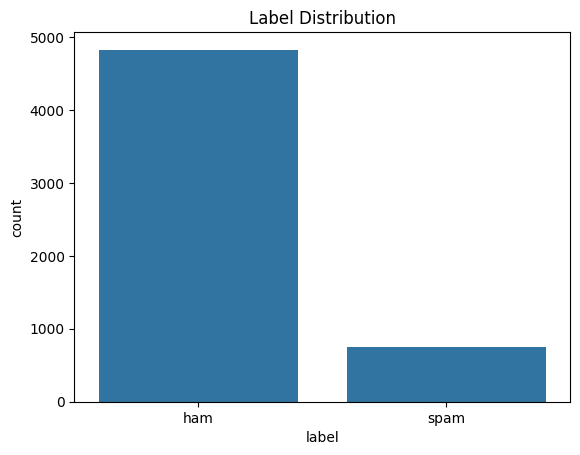

In [ ]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nLabel distribution:\n", df['label'].value_counts())
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.show()


# **Text Preprocessing**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt_tab')

# Sample data loading (replace with your dataset)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Convert to lowercase
df['message'] = df['message'].str.lower()

# Tokenize
df['tokens'] = df['message'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join lemmatized tokens into a final string
df['processed_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

df[['label', 'processed_text']].head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,label,processed_text
0,ham,"go jurong point , crazy .. available bugis n g..."
1,ham,ok lar ... joking wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor ... u c already say ...
4,ham,"nah n't think go usf , life around though"


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('processed_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['processed_text'].value_counts()
    for x_label, grp in _df_2.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('processed_text')

# **Vectorization**


In [ ]:
# Count Vectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['processed_text'])

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Show vector shapes
print("CountVectorizer shape:", X_count.shape)
print("TF-IDF shape:", X_tfidf.shape)


CountVectorizer shape: (5572, 8152)
TF-IDF shape: (5572, 8152)


# **Part 2**

**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

🔍 Classification Report:

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



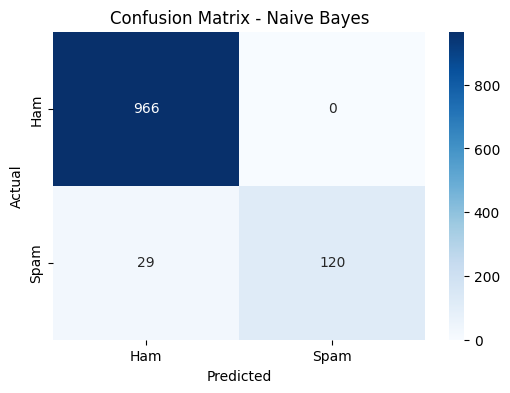

In [ ]:
#code for Part 2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Vectorize the processed text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])  # features
y = df['label']  # target

# Step 2: Split into training & test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Step 4: Evaluate the model
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


🔍 Logistic Regression Report:

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.99      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



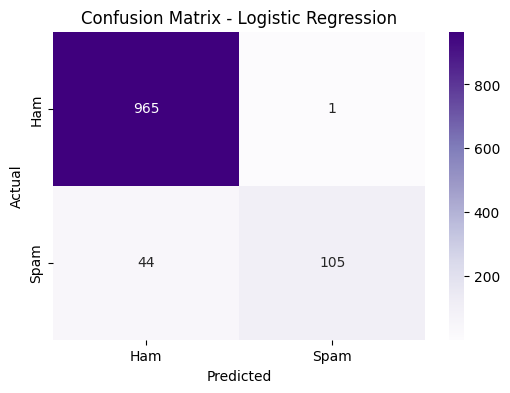

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("🔍 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I,Pranjal Lohia , confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines.

Signature: Pranjal Lohia

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion